In [14]:
import sys
sys.path.append('..')
import time
from astropy.table import Table
import pyfits as fits
import numpy as np
import matplotlib.pyplot as plt
from os.path import expanduser
from deeplens.resnet_classifier import deeplens_classifier

from deeplens.utils.blfchallenge import classify_ground_challenge 

from sklearn import metrics

home = expanduser("~")

In [15]:
x = np.zeros((18,3,101,101))
y = np.zeros((18,1))
for i in range(18):
    if i<11:
        x[i] = fits.getdata('/Users/Chris/Desktop/DECals_set/Lenses/HSC/fits_images/lens_cutout_HSC{:06d}.fits'.format(i))
    if i>=11:
        x[i] = fits.getdata('/Users/Chris/Desktop/DECals_set/Lenses/cluster/fits_images/lens_cutout_cluster{:06d}.fits'.format(i-11))
print x.shape

(18, 3, 101, 101)


In [16]:
model_num = 12

# Path to the downloaded files
# download_path=home+'/Desktop/' # To be adjusted on your machine
download_path='//Volumes/CJSTORFER/' # To be adjusted on your machine



# Path to export the data
export_path=home+'/Desktop/'   # To be adjusted on your machine

x_train = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}_cluster_nonlens/x_y_sets/x_train.npy'.format(model_num))

y_train = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}_cluster_nonlens/x_y_sets/y_train.npy'.format(model_num))

xval = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}_cluster_nonlens/x_y_sets/xval.npy'.format(model_num))

yval = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}_cluster_nonlens/x_y_sets/yval.npy'.format(model_num))

In [17]:
model = deeplens_classifier(learning_rate=0.001, learning_rate_steps=3, learning_rate_drop=0.1, batch_size=128, n_epochs=80)
model.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}_cluster_nonlens/saves/deeplens_params_70.npy'.format(model_num), x_train, y_train)

loading from /Users/Chris/Desktop/DECals_set/Trained_Models/model_12_cluster_nonlens/saves/deeplens_params_70.npy...
Model loaded


In [18]:
x.ravel()
x*=3
clip = 5

x = np.clip(x, -clip, clip)*20

print 'max ', np.max(x)
print 'min ', np.min(x)
print 'mean ', np.mean(x)
print 'std: ', np.std(x)
x.reshape(-1,3,101,101)
print x.shape

max  100.0
min  -3.82731467485
mean  0.555090347826
std:  2.507223793
(18, 3, 101, 101)


In [19]:
prediction = model.predict_proba(x)

prediction:  [  3.27472350e-07]


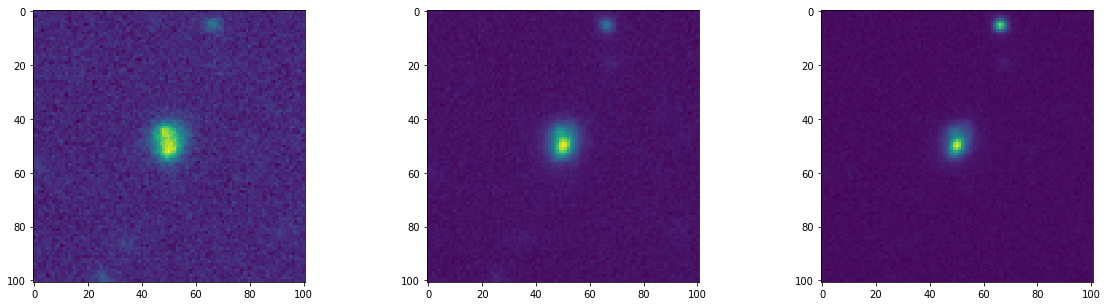

prediction:  [ 0.91450065]


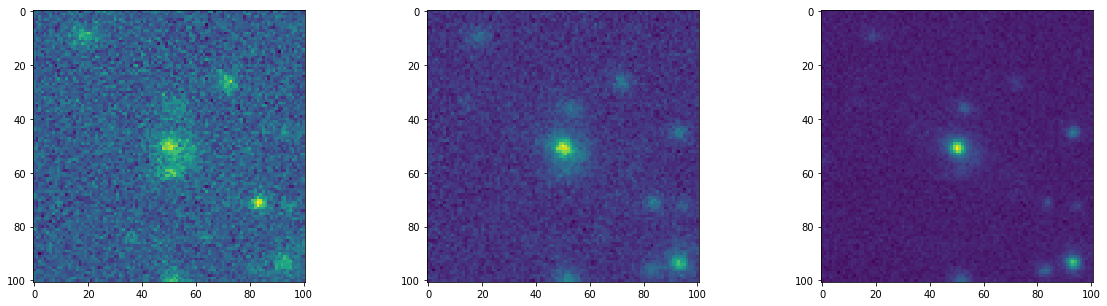

prediction:  [ 0.01877632]


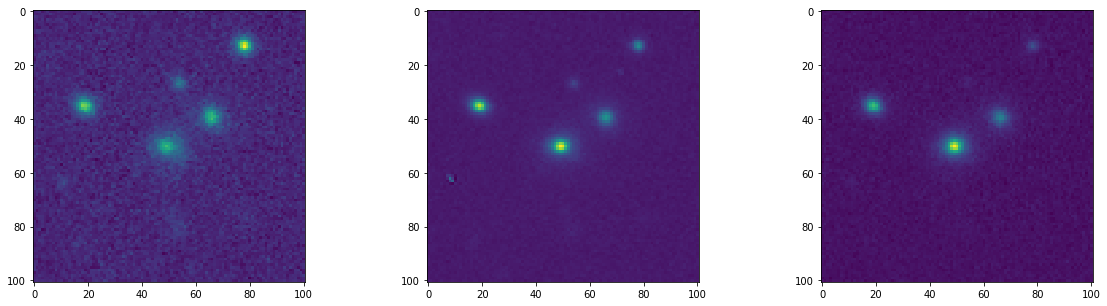

prediction:  [ 0.31815785]


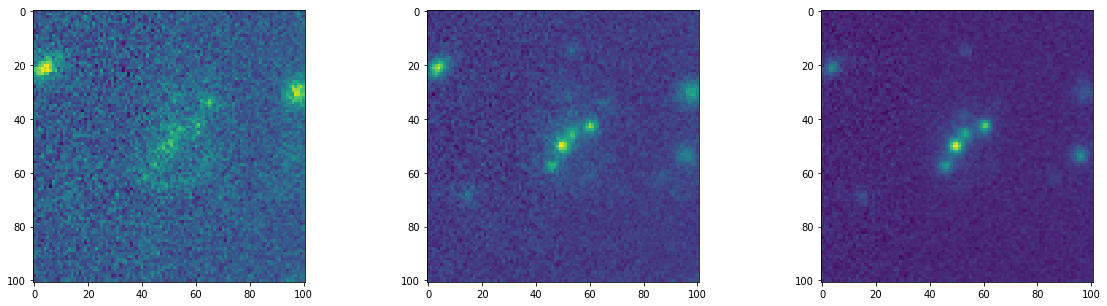

prediction:  [  7.07977790e-07]


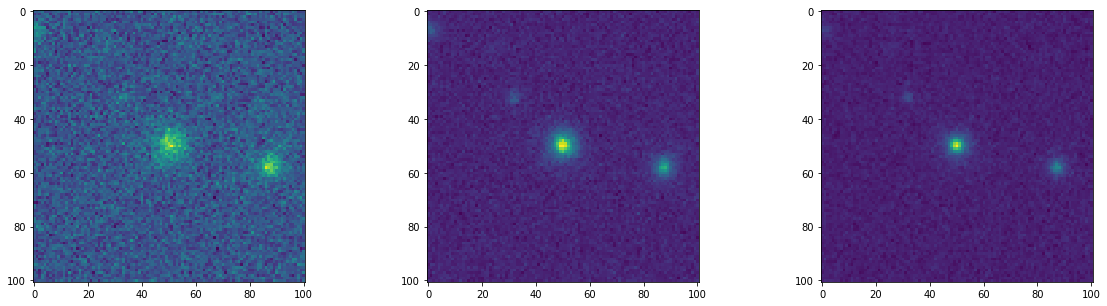

prediction:  [ 0.00011592]


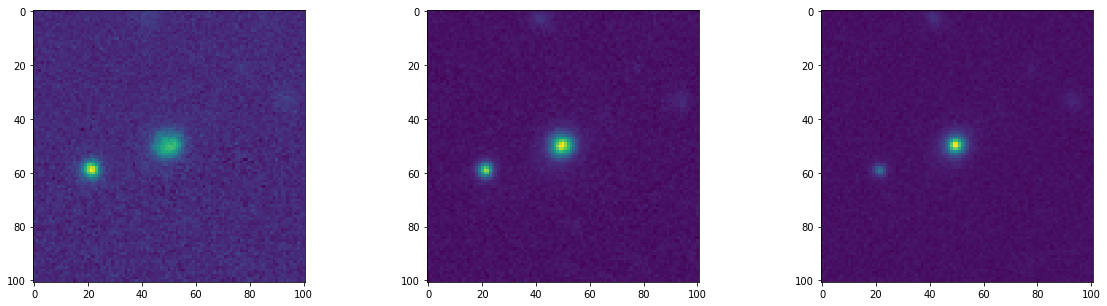

prediction:  [ 0.76307154]


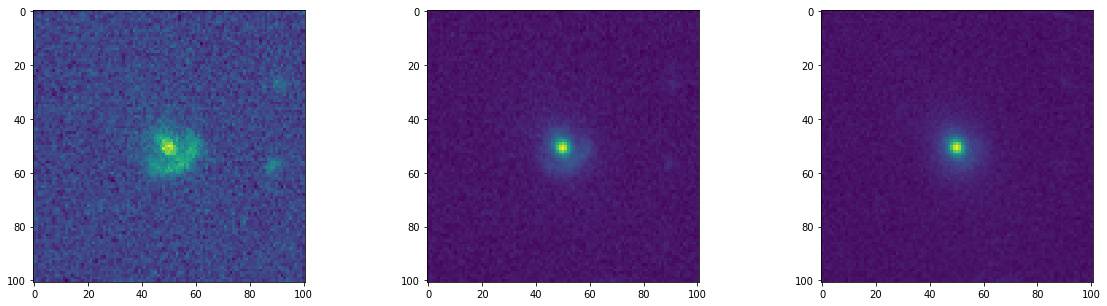

prediction:  [ 0.00012896]


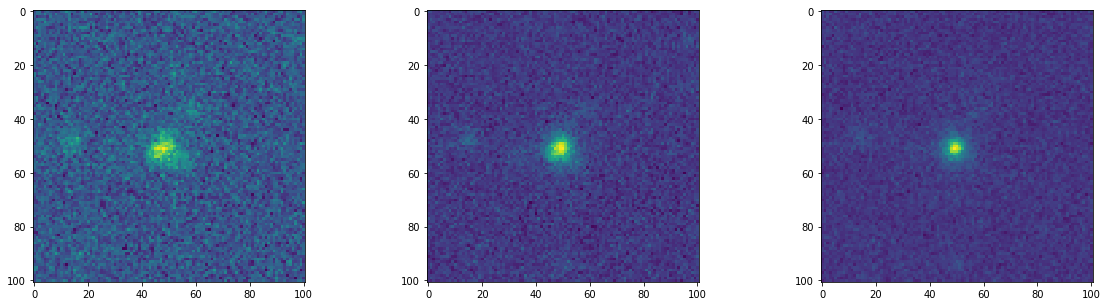

prediction:  [  7.92643259e-05]


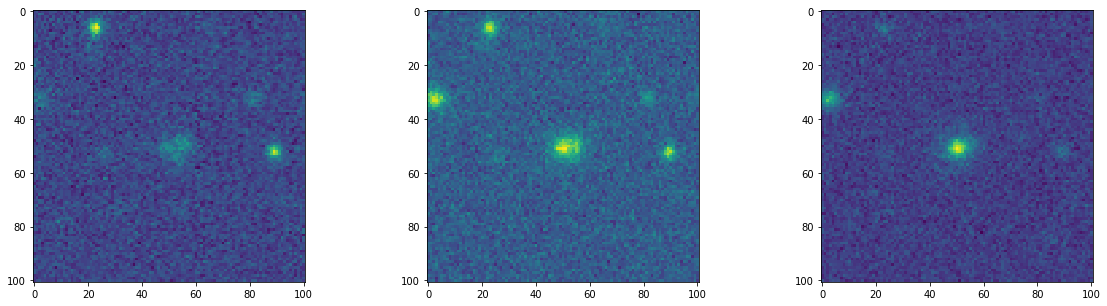

prediction:  [ 0.00746974]


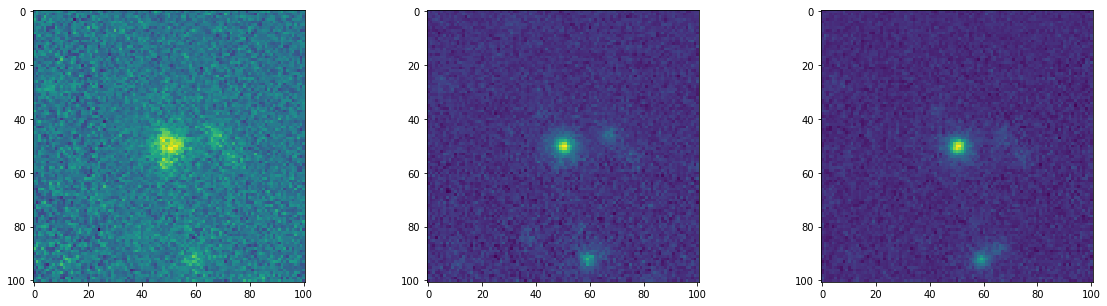

prediction:  [ 0.99859476]


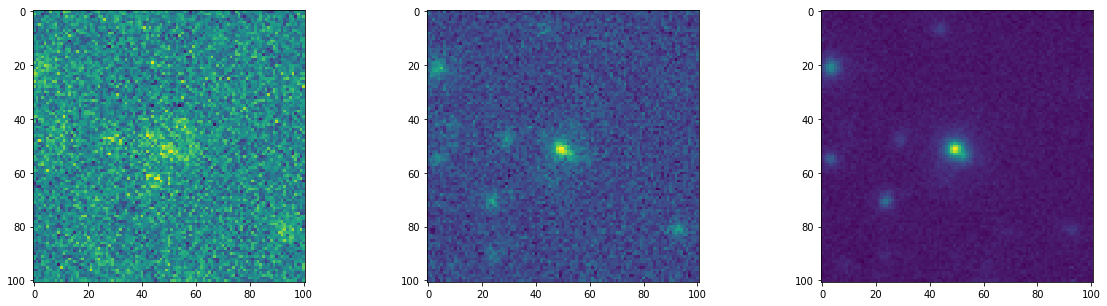

prediction:  [ 0.99888283]


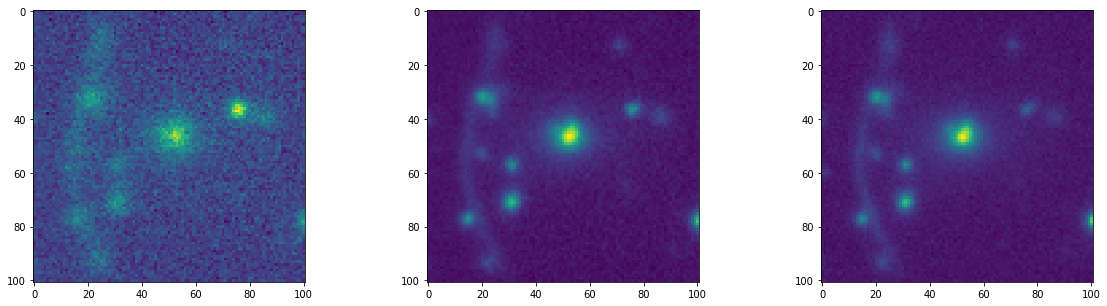

prediction:  [ 0.04947998]


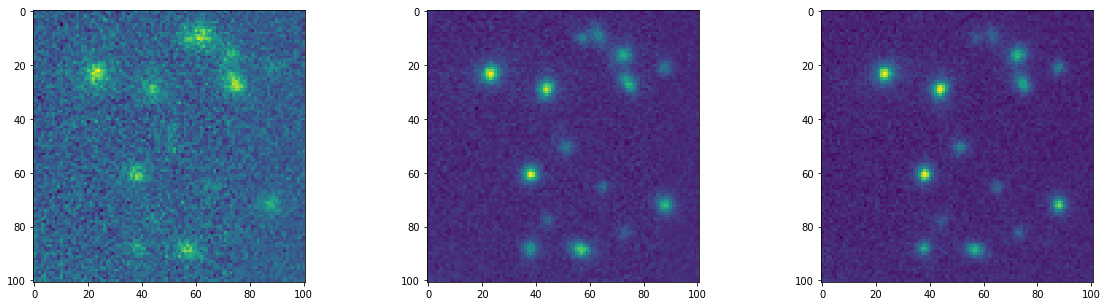

prediction:  [ 0.20540568]


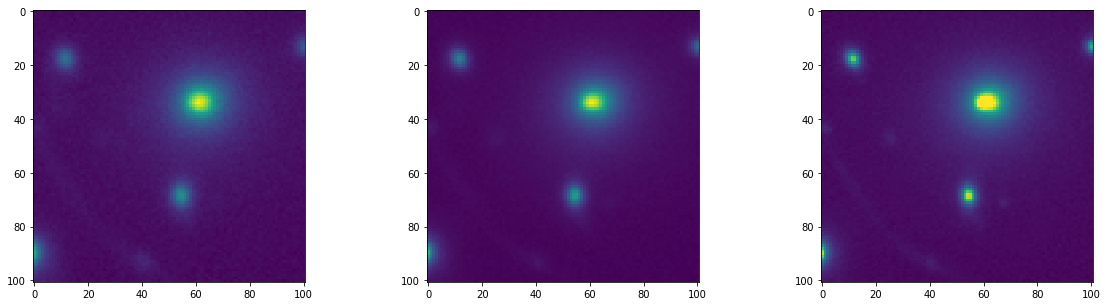

prediction:  [ 0.84487599]


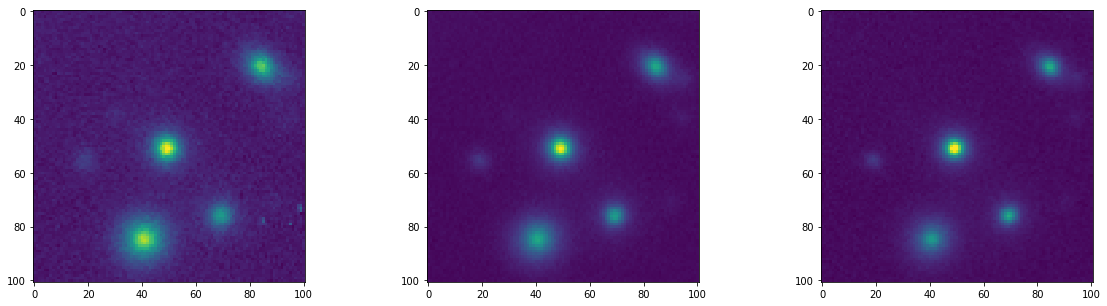

prediction:  [  7.28067607e-05]


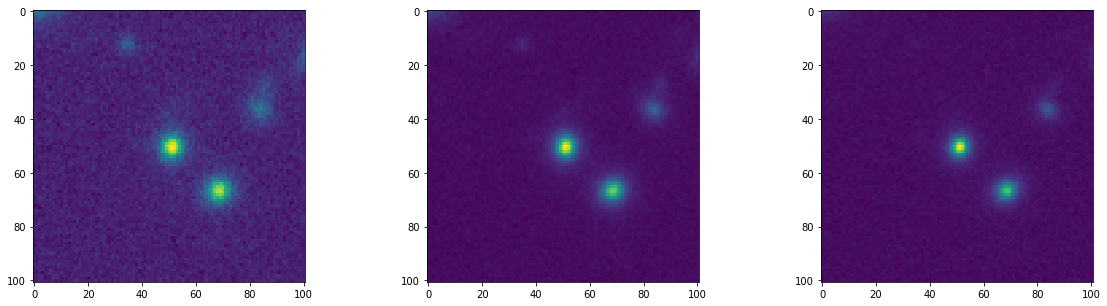

prediction:  [ 0.87945694]


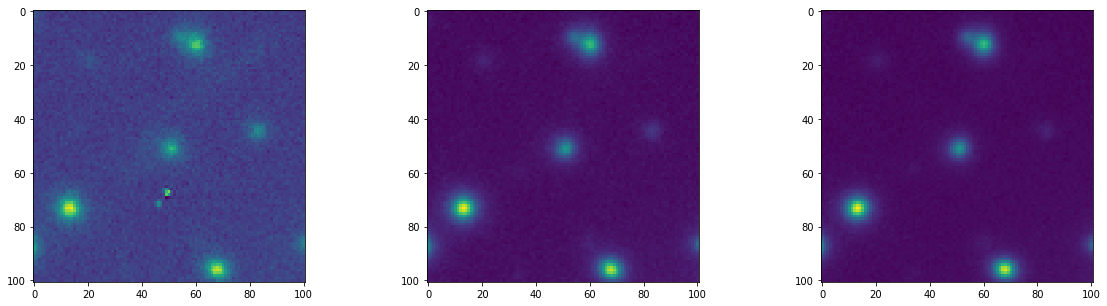

prediction:  [ 0.00135398]


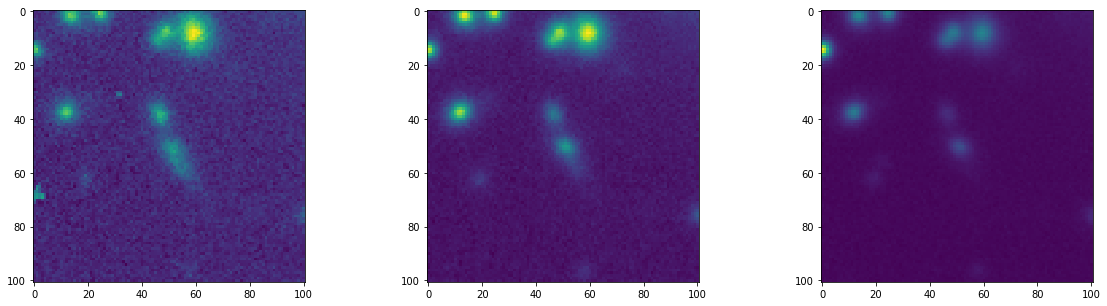

In [20]:
for i, pred in enumerate(prediction):
    print 'prediction: ',(pred)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.imshow(x[i][0].T)
    plt.subplot(132)
    plt.imshow(x[i][1].T)
    plt.subplot(133)
    plt.imshow(x[i][2].T)
    plt.show()

In [24]:
perc_TP = np.sum(prediction>=0.1)/float(prediction.shape[0])
print perc_TP

0.444444444444
